In [1]:
import os
import pandas as pd
%matplotlib inline
from newsapi import NewsApiClient
from nltk.stem import WordNetLemmatizer
from collections import Counter

In [2]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

# News Headlines Sentiment

Use of the news api to pull the latest news articles for bitcoin and ethereum and creation of a DataFrame of sentiment scores for each coin. 

Using descriptive statistics to answer the following questions:

1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [3]:
# Reading the api key environment variable
api_key = os.getenv("news_api")

In [4]:
# Creating a newsapi client
newsapi = NewsApiClient(api_key=api_key)

In [5]:
# Fetching the Bitcoin news articles
bitcoin_articles = newsapi.get_everything(q="bitcoin", language="en",sort_by="relevancy")
bitcoin_articles["articles"][0]

{'source': {'id': 'wired', 'name': 'Wired'},
 'author': 'Laura Mallonee',
 'title': 'Inside the Icelandic Facility Where Bitcoin Is Mined',
 'description': "Cryptocurrency mining now uses more of the Nordic island nation's electricity than its homes.",
 'url': 'https://www.wired.com/story/iceland-bitcoin-mining-gallery/',
 'urlToImage': 'https://media.wired.com/photos/5dbc37a4c955950008b26751/191:100/w_1280,c_limit/photo_barnard_explosions_4.jpg',
 'publishedAt': '2019-11-03T15:00:00Z',
 'content': 'Less than two miles from Icelands Reykjavik airport sits a nondescript metal building as monolithic and drab as a commercial poultry barn. Theres a deafening racket inside, too, but it doesnt come from clucking chickens. Instead, tens of thousands of whirring… [+3426 chars]'}

In [6]:
# Fetching the Ethereum news articles
ethereum_articles = newsapi.get_everything(q="ethereum", language="en",sort_by="relevancy")
ethereum_articles["articles"][0]

{'source': {'id': 'techcrunch', 'name': 'TechCrunch'},
 'author': 'Mike Butcher',
 'title': 'Sharding, scalability, decentralization – You name it, we’ve got it on the EC stage in Berlin',
 'description': 'Sharding and scalability. Transactions per second. Crypto-ecosystems. The decentralized web. These are the voyages of the Starship Blockchain, on it’s 5-year mission to seek out… Ok, you get the drift! But as you can tell, there remain many, many issues to te…',
 'url': 'http://techcrunch.com/2019/11/20/sharding-scalability-decentralization-you-name-it-weve-got-it-on-the-ec-stage-in-berlin/',
 'urlToImage': 'https://techcrunch.com/wp-content/uploads/2019/11/drake-egan-tyler.jpg?w=711',
 'publishedAt': '2019-11-20T14:24:38Z',
 'content': 'Sharding and scalability. Transactions per second.\xa0\xa0Crypto-ecosystems. The\xa0decentralized web. These are the\xa0voyages of the Starship Blockchain, on its 5-year mission to seek out Ok, you get the drift! But as you can tell,\xa0there remain 

In [7]:
# Creating the Bitcoin sentiment scores DataFrame
bitcoin_sentiments = []

for article in bitcoin_articles["articles"]:
    try:
        text = article["content"]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        bitcoin_sentiments.append({
            "compound": compound,
            "negative": neg,
            "neutral": neu,
            "positive": pos,
            "text": text
        })
        
    except AttributeError:
        pass
    
bitcoin_df = pd.DataFrame(bitcoin_sentiments)
cols = ["compound", "negative", "neutral", "positive", "text"]
bitcoin_df = bitcoin_df[cols]
bitcoin_df.head(5)

,compound,negative,neutral,positive,text
0,-0.1531,0.039,0.961,0.000,Less than two miles from Icelands Reykjavik ai...
1,0.2999,0.100,0.796,0.104,"Whether Bitcoin, an immaterial resource derive..."
2,0.0000,0.000,1.000,0.000,High school students in France may be among th...
3,0.5070,0.000,0.931,0.069,Our robot colleague Satoshi Nakaboto writes ab...
4,0.5070,0.000,0.933,0.067,Our robot colleague Satoshi Nakaboto writes ab...


In [8]:
ethereum_sentiments = []

for article in ethereum_articles["articles"]:
    try:
        text = article["content"]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        ethereum_sentiments.append({
            "compound": compound,
            "negative": neg,
            "neutral": neu,
            "positive": pos,
            "text": text
        })
        
    except AttributeError:
        pass
    
ethereum_df = pd.DataFrame(ethereum_sentiments)
cols = ["compound", "negative", "neutral", "positive", "text"]
ethereum_df = ethereum_df[cols]
ethereum_df.head(5)

,compound,negative,neutral,positive,text
0,0.3595,0.000,0.945,0.055,Sharding and scalability. Transactions per sec...
1,0.6249,0.000,0.900,0.100,Disrupt Berlin is right around the corner. And...
2,-0.3089,0.055,0.945,0.000,Blockchain has been picking up the pace since ...
3,-0.4404,0.069,0.931,0.000,A Swiss bank set up to handle both traditional...
4,0.2263,0.000,0.954,0.046,Cryptocurrency analysts have identified $400 m...


In [9]:
# Describing the Bitcoin Sentiment
bitcoin_df.describe()

,compound,negative,neutral,positive
count,19.000000,19.000000,19.000000,19.000000
mean,0.373005,0.014789,0.921842,0.063368
std,0.252732,0.028104,0.046061,0.034609
min,-0.153100,0.000000,0.796000,0.000000
25%,0.172500,0.000000,0.911500,0.066000
50%,0.507000,0.000000,0.932000,0.067000
75%,0.507000,0.019000,0.933000,0.070500
max,0.816600,0.100000,1.000000,0.143000


In [10]:
# Describing the Ethereum Sentiment
ethereum_df.describe()

,compound,negative,neutral,positive
count,20.000000,20.000000,20.000000,20.000000
mean,0.291970,0.020250,0.913100,0.066700
std,0.290867,0.033002,0.069593,0.049088
min,-0.440400,0.000000,0.738000,0.000000
25%,0.244075,0.000000,0.896250,0.045000
50%,0.359500,0.000000,0.940500,0.056000
75%,0.463275,0.045250,0.948750,0.101000
max,0.690800,0.090000,1.000000,0.173000


---

# Tokenizer

Use of NLTK to tokenize the text for each coin. 

In [11]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [12]:
# Contents from "text" column in setiment scores dataframes to lists 
bitcoin_articles_list = bitcoin_df['text'].tolist()
ethereum_articles_list = ethereum_df['text'].tolist()

In [13]:
# Completing the tokenizer function

bitcoin_tokenized = []
ethereum_tokenized = []
bitcoin_tokenized_single_list = []
ethereum_tokenized_single_list = []
lemmatizer = WordNetLemmatizer()

def tokenizer(text):
    """Tokenizes text."""
    regex = re.compile("[^a-zA-Z ]")
    re_clean = regex.sub('', text)
    words = word_tokenize(re_clean)
    sw = set(stopwords.words('english'))
    lem = [lemmatizer.lemmatize(word) for word in words]
    result = [word.lower() for word in lem if word.lower() not in sw]
    return result

for article in bitcoin_articles_list:
    tokenized_article = tokenizer(article)
    bitcoin_tokenized.append(tokenized_article)
    bitcoin_tokenized_single_list.extend(tokenized_article)
    
for article in ethereum_articles_list:
    tokenized_article = tokenizer(article)
    ethereum_tokenized.append(tokenized_article)
    ethereum_tokenized_single_list.extend(tokenized_article)

In [14]:
# Creating a new tokens column for bitcoin and Ethereum
bitcoin_df['tokens'] = bitcoin_tokenized
ethereum_df['tokens'] = ethereum_tokenized

In [15]:
bitcoin_df.head()

,compound,negative,neutral,positive,text,tokens
0,-0.1531,0.039,0.961,0.000,Less than two miles from Icelands Reykjavik ai...,"[less, two, mile, icelands, reykjavik, airport..."
1,0.2999,0.100,0.796,0.104,"Whether Bitcoin, an immaterial resource derive...","[whether, bitcoin, immaterial, resource, deriv..."
2,0.0000,0.000,1.000,0.000,High school students in France may be among th...,"[high, school, student, france, may, among, fi..."
3,0.5070,0.000,0.931,0.069,Our robot colleague Satoshi Nakaboto writes ab...,"[robot, colleague, satoshi, nakaboto, writes, ..."
4,0.5070,0.000,0.933,0.067,Our robot colleague Satoshi Nakaboto writes ab...,"[robot, colleague, satoshi, nakaboto, writes, ..."


In [16]:
ethereum_df.head()

,compound,negative,neutral,positive,text,tokens
0,0.3595,0.000,0.945,0.055,Sharding and scalability. Transactions per sec...,"[sharding, scalability, transactions, per, sec..."
1,0.6249,0.000,0.900,0.100,Disrupt Berlin is right around the corner. And...,"[disrupt, berlin, right, around, corner, plent..."
2,-0.3089,0.055,0.945,0.000,Blockchain has been picking up the pace since ...,"[blockchain, ha, picking, pace, since, incepti..."
3,-0.4404,0.069,0.931,0.000,A Swiss bank set up to handle both traditional...,"[swiss, bank, set, handle, traditional, financ..."
4,0.2263,0.000,0.954,0.046,Cryptocurrency analysts have identified $400 m...,"[cryptocurrency, analyst, identified, million,..."


---

# NGrams and Frequency Analysis

Looking at the ngrams and word frequency for each coin. 

1. Using NLTK to produce the n-grams for N = 2. 
2. Listing the top 10 words for each coin. 

In [17]:
from collections import Counter
from nltk import ngrams

In [18]:
# Generating the Bitcoin N-grams where N=2
bigram_counts_bitcoin = Counter(ngrams(bitcoin_tokenized_single_list, n=2))
print(dict(bigram_counts_bitcoin))

{('less', 'two'): 1, ('two', 'mile'): 1, ('mile', 'icelands'): 1, ('icelands', 'reykjavik'): 1, ('reykjavik', 'airport'): 1, ('airport', 'sits'): 1, ('sits', 'nondescript'): 1, ('nondescript', 'metal'): 1, ('metal', 'building'): 1, ('building', 'monolithic'): 1, ('monolithic', 'drab'): 1, ('drab', 'commercial'): 1, ('commercial', 'poultry'): 1, ('poultry', 'barn'): 1, ('barn', 'theres'): 1, ('theres', 'deafening'): 1, ('deafening', 'racket'): 1, ('racket', 'inside'): 1, ('inside', 'doesnt'): 1, ('doesnt', 'come'): 1, ('come', 'clucking'): 1, ('clucking', 'chicken'): 1, ('chicken', 'instead'): 1, ('instead', 'ten'): 1, ('ten', 'thousand'): 1, ('thousand', 'whirring'): 1, ('whirring', 'char'): 1, ('char', 'whether'): 1, ('whether', 'bitcoin'): 1, ('bitcoin', 'immaterial'): 1, ('immaterial', 'resource'): 1, ('resource', 'derived'): 1, ('derived', 'hype'): 1, ('hype', 'blind'): 1, ('blind', 'faith'): 1, ('faith', 'vanish'): 1, ('vanish', 'thin'): 1, ('thin', 'air'): 1, ('air', 'uncertain')

In [37]:
# Generatimng the Ethereum N-grams where N=2
bigram_counts_ethereum = Counter(ngrams(ethereum_tokenized_single_list, n=2))
print(dict(bigram_counts_ethereum))

{('sharding', 'scalability'): 2, ('scalability', 'transactions'): 2, ('transactions', 'per'): 2, ('per', 'secondcryptoecosystems'): 2, ('secondcryptoecosystems', 'thedecentralized'): 2, ('thedecentralized', 'web'): 2, ('web', 'thevoyages'): 2, ('thevoyages', 'starship'): 2, ('starship', 'blockchain'): 2, ('blockchain', 'year'): 2, ('year', 'mission'): 2, ('mission', 'seek'): 2, ('seek', 'ok'): 2, ('ok', 'get'): 2, ('get', 'drift'): 2, ('drift', 'tellthere'): 2, ('tellthere', 'remain'): 2, ('remain', 'many'): 2, ('many', 'many'): 2, ('many', 'issue'): 2, ('issue', 'tea'): 2, ('tea', 'char'): 2, ('char', 'disrupt'): 1, ('disrupt', 'berlin'): 1, ('berlin', 'right'): 1, ('right', 'around'): 1, ('around', 'corner'): 1, ('corner', 'plenty'): 1, ('plenty', 'look'): 1, ('look', 'forward'): 1, ('forward', 'tojoin'): 1, ('tojoin', 'u'): 1, ('u', 'december'): 1, ('december', 'december'): 1, ('december', 'hear'): 1, ('hear', 'industry'): 1, ('industry', 'leader'): 1, ('leader', 'investor'): 1, ('i

In [38]:
# Using the token_count function to generate the top 10 words from each coin
def token_count(tokens, N=10):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

# Getting the top 10 words for Bitcoin
token_count(bitcoin_tokenized_single_list)

[('bitcoin', 46),
 ('satoshi', 26),
 ('nakaboto', 26),
 ('char', 19),
 ('robot', 13),
 ('colleague', 13),
 ('writes', 13),
 ('every', 13),
 ('fucking', 13),
 ('daywelcome', 13)]

In [39]:
# Getting the top 10 words for Ethereum
token_count(ethereum_tokenized_single_list)

[('char', 20),
 ('cryptocurrency', 12),
 ('ha', 9),
 ('blockchain', 7),
 ('xrp', 7),
 ('bitcoin', 6),
 ('many', 5),
 ('bank', 5),
 ('year', 4),
 ('ethereum', 4)]

# Word Clouds

Generation of word clouds for each coin to summarize the news for each coin

In [23]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

In [24]:
# Generating the Bitcoin word cloud
bitcoin_str = ' '.join(bitcoin_tokenized_single_list)
ethereum_str = ' '.join(ethereum_tokenized_single_list)

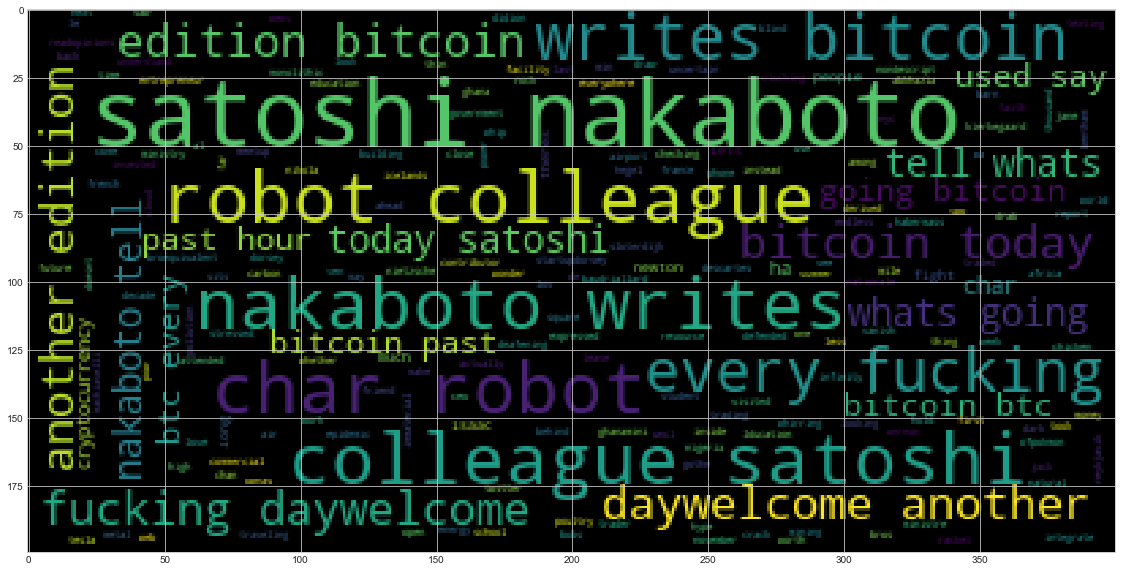

In [25]:
wc_bitcoin = WordCloud().generate(bitcoin_str)
plt.imshow(wc_bitcoin)

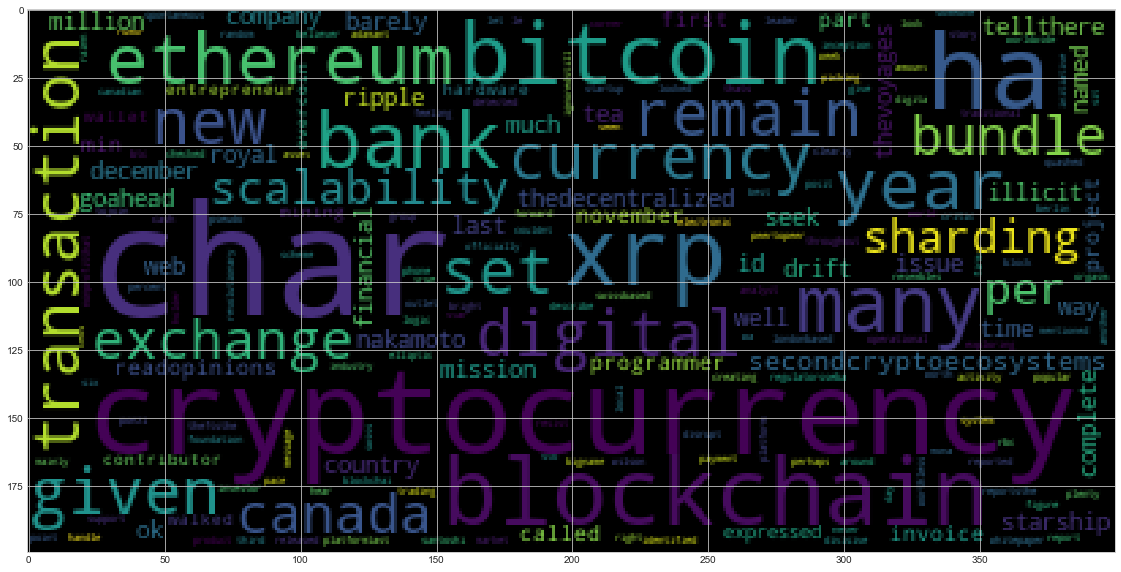

In [26]:
# Generating the Ethereum word cloud
wc_ethereum = WordCloud().generate(ethereum_str)
plt.imshow(wc_ethereum)

In [27]:
import spacy
from spacy import displacy

# Loading the spacy model

nlp = spacy.load("en_core_web_sm")

## Bitcoin NER

In [46]:
# Runnig the NER processor on all of the text
doc = nlp(bitcoin_str)
# Adding a title to the document
doc.user_data["title"] = "Bitcoin NER"
# Rendering the visualization
displacy.render(doc, style='ent')

In [33]:
# Listing all Entities

#Bitcoin

for ent in doc.ents:
    print(ent.text, ent.label_)

Binance PERSON
Binance GPE
around $8,130 MONEY
60.84 percent PERCENT
the past month DATE
3,086.14 MONEY
the latter half of 2017 DATE
$40 million MONEY
Bitcoin GPE
Flexa ORG
today DATE
GameStop ORG
Nordstrom NORP
7,000 CARDINAL
Bitcoin GPE
Thursday DATE
Bitcoin GPE
6,000 MONEY
first ORDINAL
November last year DATE
$15 million MONEY
Europol PERSON
three CARDINAL
second ORDINAL
more than €550,000 MONEY
around $615,000 MONEY
last week DATE
’m PERSON
May 7 DATE
about 10,000 CARDINAL
Baltimore GPE
RobbinHood ORG
13 CARDINAL
76,280 MONEY
today DATE
102,310 MONEY
Binance PERSON
last week's DATE
7,000 CARDINAL
roughly $40 million MONEY
Monday DATE
Binance GPE
one CARDINAL
about 7,000 CARDINAL
around $40 million MONEY
Bloomb PERSON
Tether PERSON
New Yorks GPE
month DATE
California GPE
Maine GPE
New York GPE
Albany GPE
Peter da Silva PERSON
the National Academy of Sciencies ORG
1965 DATE
Bitcoin BTC ORG
Tether ORG
Bitcoin GPE
Bitcoin GPE
the Wall Street Market FAC
European NORP
U.S. GPE
Millions 

---

## Ethereum NER

In [43]:
# Running the NER processor on all of the text
doc_2 = nlp(ethereum_str)
# Adding a title to the document
doc_2.user_data["title"] = "Ethereum NER"
# Rendering the visualization
displacy.render(doc_2, style='ent')

In [44]:
# Listing all Entities

#Ethereum

for ent in doc_2.ents:
    print(ent.text, ent.label_)

blockchain GPE
year DATE
berlin GPE
december december DATE
pseudo group ORG
bitcoin GPE
blockchai char swiss bank ORG
identified million CARDINAL
xrp xrp PERSON
xrp PERSON
platformlast week DATE
canadian NORP
royal bank canada ORG
six CARDINAL
xrp xrp PERSON
bitcoin GPE
third ORDINAL
bitcoin PERSON
blockchain GPE
last year DATE
chinese NORP
framework dl char PERSON
november DATE
british columbia ORG
canada GPE
million CARDINAL
year DATE
justin ORG
jinglan wang feedbackin PERSON
char gray morning WORK_OF_ART
san francisco GPE
two CARDINAL
ten CARDINAL
november DATE
first ORDINAL
digital ORG
bitcoin GPE
massesa ORG
